In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

### Data Preparation

In [208]:
from sklearn import datasets
iris=datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [209]:
cols=iris['feature_names']
mod_cols=list(map(lambda x: str(x).replace(' (cm)', '').capitalize(), cols))
mod_cols

['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

In [210]:
df_iris=pd.DataFrame(data=iris['data'], columns=mod_cols)
df_iris.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [211]:
df_iris.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


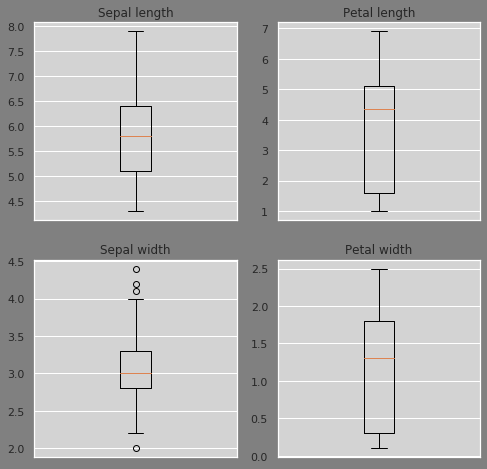

In [212]:
rows, cols=2, 2
fig, subaxes = plt.subplots(rows, cols, figsize=(8,8))
fig.set_facecolor("grey")

mul_axes=[(i, j) for j in list(range(cols)) for i in list(range(rows))]

for pos, col in zip(mul_axes, df_iris.columns):
    subaxes[pos].boxplot(df_iris[col])
    subaxes[pos].set_xticks([])
    subaxes[pos].set_title(col, fontsize=12)
    subaxes[pos].set_facecolor('lightgrey')
    
plt.show()

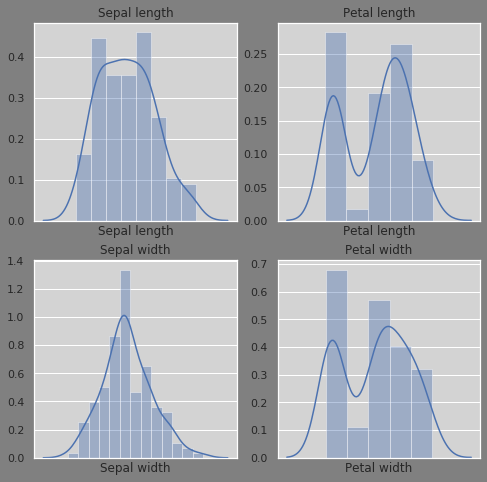

In [213]:
rows, cols=2, 2
fig, subaxes = plt.subplots(rows, cols, figsize=(8,8))
fig.set_facecolor("grey")

mul_axes=[(i, j) for j in list(range(cols)) for i in list(range(rows))]

for pos, col in zip(mul_axes, df_iris.columns):
    sns.distplot(df_iris[col], ax=subaxes[pos])
    subaxes[pos].set_xticks([])
    subaxes[pos].set_title(col, fontsize=12)
    subaxes[pos].set_facecolor('lightgrey')
    
plt.show()

In [214]:
df_tgt_class=pd.DataFrame(iris['target'], columns=['Class_ID'])
print (iris['target_names'])
df_tgt_class['Class_ID'].value_counts()

['setosa' 'versicolor' 'virginica']


2    50
1    50
0    50
Name: Class_ID, dtype: int64

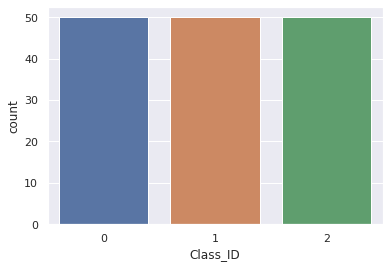

In [215]:
sns.countplot(x='Class_ID', data=df_tgt_class)
plt.show()

In [216]:
df_features=df_iris.copy()
df_features['Sepal Area']=df_features['Sepal length'] * df_features['Sepal width']
df_features['Petal Area']=df_features['Petal length'] * df_features['Petal width']

df_features=pd.merge(df_features, df_tgt_class, left_index=True, right_index=True, how='inner')
df_features.rename(columns={0:'Class'}, inplace=True)
df_features.head()

,Sepal length,Sepal width,Petal length,Petal width,Sepal Area,Petal Area,Class_ID
0,5.1,3.5,1.4,0.2,17.85,0.28,0
1,4.9,3.0,1.4,0.2,14.70,0.28,0
2,4.7,3.2,1.3,0.2,15.04,0.26,0
3,4.6,3.1,1.5,0.2,14.26,0.30,0
4,5.0,3.6,1.4,0.2,18.00,0.28,0


In [217]:
from scipy.stats import pearsonr
pearson_coeff, pearson_pval=[],[]

for col in df_features.columns:
    coef_, pval_=pearsonr(df_features[col], df_features['Class_ID'])
    pearson_coeff.append(coef_)
    pearson_pval.append(pval_)

cols_list=list(df_features.columns)
df_pearson_stats=pd.DataFrame({'Feature':cols_list, 'Coeff':pearson_coeff, 'P_val':pearson_pval})

df_pearson_stats.round(4).sort_values(by='Coeff', ascending=False)

,Feature,Coeff,P_val
6,Class_ID,1.0000,0.0000
3,Petal width,0.9565,0.0000
5,Petal Area,0.9501,0.0000
2,Petal length,0.9490,0.0000
0,Sepal length,0.7826,0.0000
4,Sepal Area,0.2957,0.0002
1,Sepal width,-0.4267,0.0000


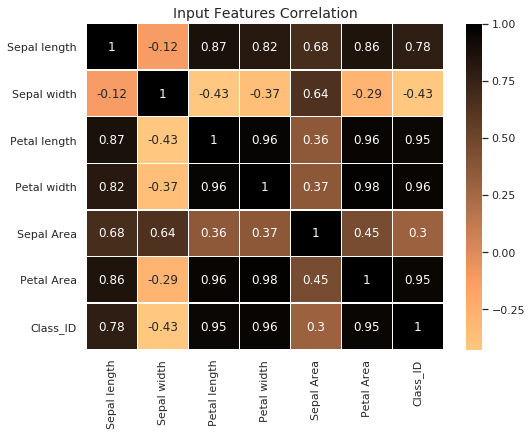

In [218]:
from matplotlib import cm
def plot_heatmap(df_inp_):
    
    df_heatmap=df_pearson_stats.iloc[:,0:2].reset_index(drop=False)
    df_heatmap=df_heatmap.pivot(index='index', columns='Feature', values='Coeff')

    plt.figure(figsize=(8,6))
    #rev_color=colors.Colormap.reversed('copper')
    sns.heatmap(df_inp_.corr(), annot=df_features.corr().values, linewidths=0.3, cmap='copper_r')
    #plt.axis('off')
    plt.title("Input Features Correlation", fontsize='14')
    plt.ylim(7.0, 0.0)
    plt.show()
    
plot_heatmap(df_features)

In [219]:
features=['Petal length', 'Petal width']

X=df_features[features].values
y=df_features['Class_ID'].values
X.shape, y.shape

((150, 2), (150,))

In [220]:
model_accuracy=dict()
lookup_flower=dict(zip(np.unique(iris['target']), iris['target_names']))
lookup_flower.values()

dict_values(['setosa', 'versicolor', 'virginica'])

### Train test split

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 2), (105,), (45, 2), (45,))

In [222]:

def show_decision_boundary(model, X, y, model_name):

    light_shades = ['thistle', 'khaki', 'lightblue']
    dark_shades = ['limegreen', 'blue', 'crimson']
    c_light = ListedColormap(light_shades[0:3])
    c_bold  = ListedColormap(dark_shades[0:3])

    x_min, y_min=min(X_train[:, 0]), min(X_train[:, 1])
    x_max, y_max=max(X_train[:, 0]), max(X_train[:, 1])
    
    x_co=np.linspace(x_min-1, x_max+1, np.size(X_train[:, 0])+1)
    y_co=np.linspace(y_min-1, y_max+1, np.size(X_train[:, 1])+1)

    x_mesh, y_mesh=np.meshgrid(x_co, y_co)

    mesh_region=model.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
    mesh_region=mesh_region.reshape(x_mesh.shape)
    
    plt.figure(figsize=(8,8))
    plt.contourf(x_mesh, y_mesh, mesh_region, cmap=c_light)
    plt.scatter(X_train[:,0], X_train[:,1], c=y, cmap=c_bold, edgecolor='black')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(model_name + '- Decision boundaries', fontsize='14')
    
    cust_legends=[]
    for key, class_name in lookup_flower.items():
        cust_patch = mpatches.Patch(color=dark_shades[key], label=class_name)
        cust_legends.append(cust_patch)
    
    plt.legend(handles=cust_legends, loc='upper left')
    plt.show()

### K-Nearest neighbors

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters=[{'n_neighbors':list(range(1,11))}]

KNN_grid_search=GridSearchCV(KNeighborsClassifier(), parameters, cv=3)
KNN_grid_search.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [224]:
KNN=KNN_grid_search.best_estimator_
print ("Best grid search score:{:.2f}".format(KNN_grid_search.best_score_))
KNN

Best grid search score:0.95


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [225]:
knn_trn_score=KNN.score(X_train, y_train)
knn_tst_score=KNN.score(X_test, y_test)

print ("Train score:{:.2f};  Test score:{:.2f}".format(knn_trn_score, knn_tst_score))

Train score:0.95;  Test score:1.00


In [226]:
from sklearn.model_selection import cross_val_score

knn_cv_scores=cross_val_score(KNN, X, y, cv=3)
model_accuracy['KNeighbors']=knn_cv_scores.mean().round(2)

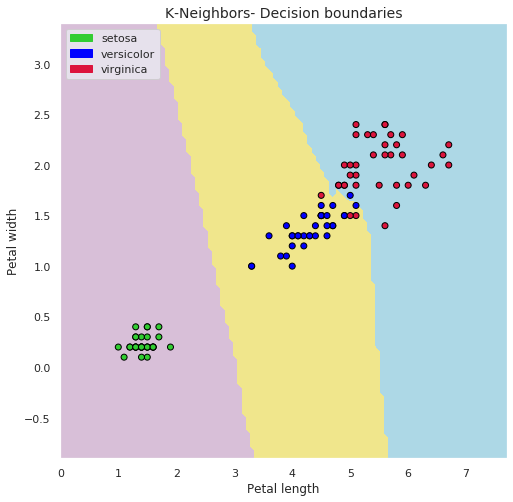

In [227]:
show_decision_boundary(KNN, X_train, y_train, "K-Neighbors")

### Logistic Regression

In [228]:
from sklearn.linear_model import LogisticRegression

regularization_param=[{'C':[0.001, 0.1, 1, 10, 100, 1000], 'solver':['lbfgs'], 'multi_class':['auto']}]

log_reg_grid=GridSearchCV(LogisticRegression(), regularization_param, cv=3)
log_reg_grid.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs'], 'multi_class': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [229]:
logit_clf=log_reg_grid.best_estimator_
print ("Best grid search score:{:.2f}".format(log_reg_grid.best_score_))
logit_clf

Best grid search score:0.94


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [230]:
lg_trn_score=logit_clf.score(X_train, y_train)
lg_tst_score=logit_clf.score(X_test, y_test)

print ("Train score:{:.2f};  Test score:{:.2f}".format(lg_trn_score, lg_tst_score))

Train score:0.96;  Test score:1.00


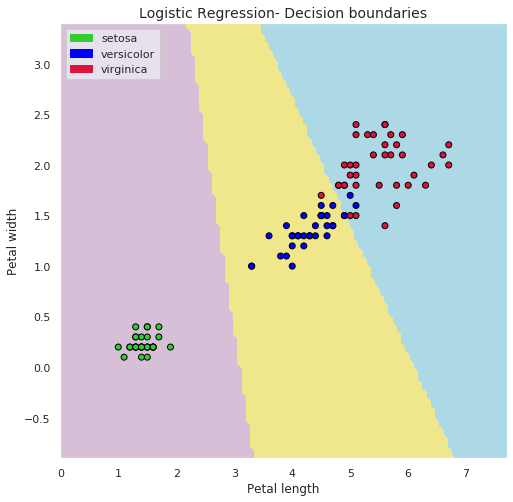

In [231]:
lg_cv_scores=cross_val_score(logit_clf, X, y, cv=3)
model_accuracy['Logit']=lg_cv_scores.mean().round(2)

show_decision_boundary(logit_clf, X_train, y_train, "Logistic Regression")

### Support vector machine 

In [232]:
from sklearn.svm import SVC

parameters=[{'kernel':['poly', 'sigmoid', 'rbf'], 'C':[0.1, 1, 10], 'gamma':[1, 5, 10]}]

svc_grid=GridSearchCV(SVC(), parameters, cv=3)
svc_grid.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['poly', 'sigmoid', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [1, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [233]:
svc_clf=svc_grid.best_estimator_
print ("Best grid search score:{:.2f}".format(svc_grid.best_score_))
svc_clf

Best grid search score:0.97


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [234]:
svc_trn_score=svc_clf.score(X_train, y_train)
svc_tst_score=svc_clf.score(X_test, y_test)

print ("Train score:{:.2f};  Test score:{:.2f}".format(svc_trn_score, svc_tst_score))

Train score:0.95;  Test score:0.98


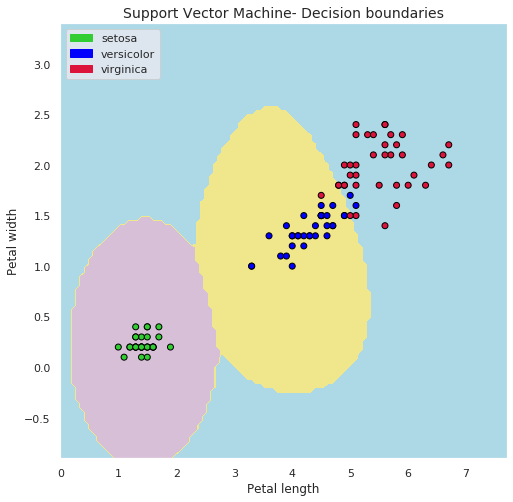

In [235]:
svc_cv_scores=cross_val_score(svc_clf, X, y, cv=3)
model_accuracy['SVM']=svc_cv_scores.mean().round(2)

show_decision_boundary(svc_clf, X_train, y_train, "Support Vector Machine")

### 4.Decision Tree

In [236]:
from sklearn.tree import DecisionTreeClassifier

parameters=[{'criterion':['gini','entropy'], 'max_depth':[5,6,7,8,9], 'min_samples_leaf':range(1,5)}]

dtree_grid=GridSearchCV(DecisionTreeClassifier(), parameters, cv=3)
dtree_grid.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': range(1, 5)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [237]:
dtree_clf=dtree_grid.best_estimator_
print ("Best grid search score:{:.2f}".format(dtree_grid.best_score_))
svc_clf

Best grid search score:0.93


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [238]:
dt_trn_score=dtree_clf.score(X_train, y_train)
dt_tst_score=dtree_clf.score(X_test, y_test)

print ("Train score:{:.2f};  Test score:{:.2f}".format(dt_trn_score, dt_tst_score))

Train score:0.97;  Test score:1.00


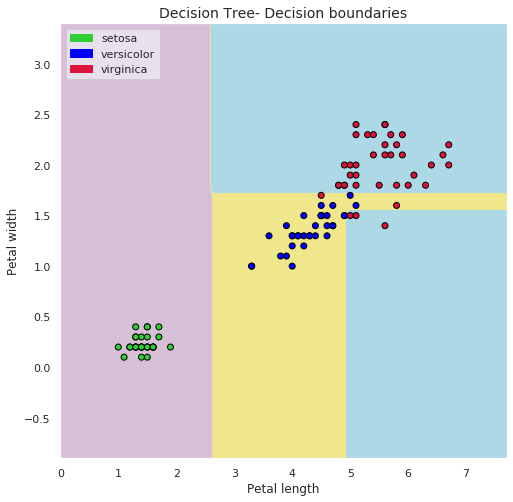

In [239]:
dt_cv_scores=cross_val_score(dtree_clf, X, y, cv=3)
model_accuracy['Decision Tree']=dt_cv_scores.mean().round(2)

show_decision_boundary(dtree_clf, X_train, y_train, "Decision Tree")

### Naive Bayes Classifier

In [240]:
from sklearn.naive_bayes import GaussianNB

NBGaussian_clf=GaussianNB()
NBGaussian_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [241]:
nb_trn_score=NBGaussian_clf.score(X_train, y_train)
nb_tst_score=NBGaussian_clf.score(X_test, y_test)

print ("Train score:{:.2f};  Test score:{:.2f}".format(nb_trn_score, nb_tst_score))

Train score:0.94;  Test score:1.00


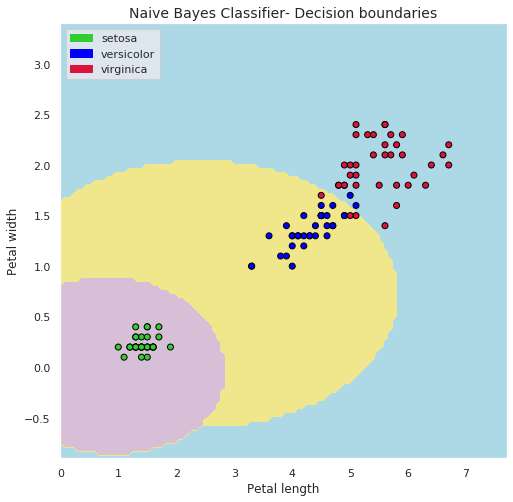

In [242]:
nb_cv_scores=cross_val_score(NBGaussian_clf, X, y, cv=3)
model_accuracy['Naive Bayes']=nb_cv_scores.mean().round(2)

show_decision_boundary(NBGaussian_clf, X_train, y_train, "Naive Bayes Classifier")

### Random Forest Classifier

In [243]:
from sklearn.ensemble import RandomForestClassifier

params=[{'n_estimators':list(range(1,10))}]

RForest_search=GridSearchCV(RandomForestClassifier(random_state=9), params, cv=3)
RForest_search.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=9, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [244]:
RForest_clf=RForest_search.best_estimator_

rf_trn_score=RForest_clf.score(X_train, y_train)
rf_tst_score=RForest_clf.score(X_test, y_test)

print ("Train score:{:.2f};  Test score:{:.2f}".format(rf_trn_score, rf_tst_score))

Train score:0.98;  Test score:1.00


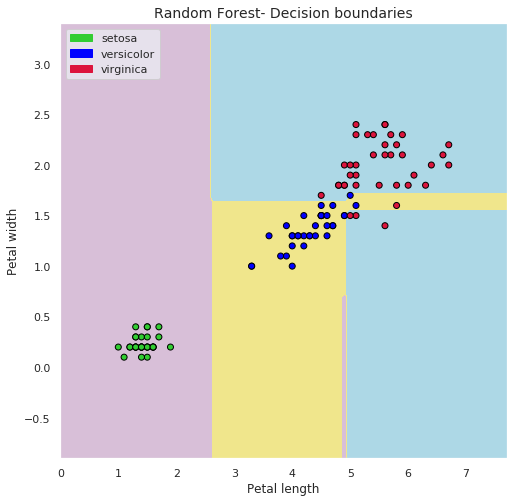

In [245]:
rf_cv_scores=cross_val_score(RForest_clf, X, y, cv=3)
model_accuracy['Random Forest']=rf_cv_scores.mean().round(2)

show_decision_boundary(RForest_clf, X_train, y_train, "Random Forest")

### 8. Gradient Boost Classifier

In [246]:
from sklearn.ensemble import GradientBoostingClassifier

params=[{'n_estimators':range(1,5), 'max_depth':[2,3,4], 'learning_rate':[0.01, 0.02, 0.03]}]

GB_grid=GridSearchCV(GradientBoostingClassifier(), params, cv=3)
GB_grid.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': range(1, 5), 'max_depth': [2, 3, 4], 'learning_rate': [0.01, 0.02, 0.03]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [247]:
GB_clf=GB_grid.best_estimator_

gb_trn_score=GB_clf.score(X_train, y_train)
gb_tst_score=GB_clf.score(X_test, y_test)

print ("Train score:{:.2f};  Test score:{:.2f}".format(gb_trn_score, gb_tst_score))

Train score:0.99;  Test score:1.00


In [248]:
tgt_prd=GB_clf.predict([[3.1, 4.2]])
lookup_flower.get(tgt_prd.item()), lookup_flower.values()

('virginica', dict_values(['setosa', 'versicolor', 'virginica']))

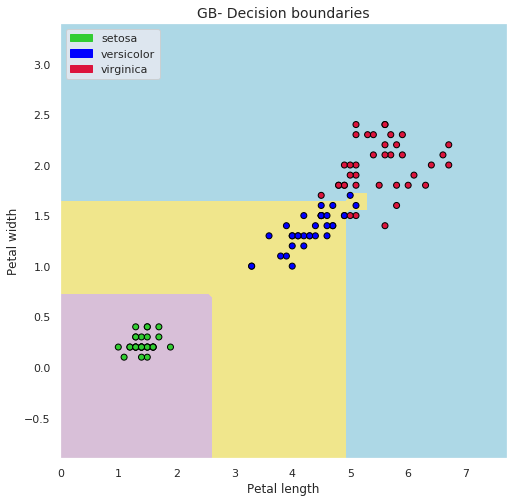

In [249]:
gb_cv_scores=cross_val_score(GB_clf, X, y, cv=3)
model_accuracy['Gradient Boost']=gb_cv_scores.mean().round(2)

show_decision_boundary(GB_clf, X_train, y_train, "GB")

### Models accuracy report

In [250]:
df_models_summary=pd.DataFrame(model_accuracy.values(), columns=['Accuracy'], index=model_accuracy.keys())
df_models_summary

,Accuracy
KNeighbors,0.95
Logit,0.97
SVM,0.96
Decision Tree,0.96
Naive Bayes,0.96
Random Forest,0.96
Gradient Boost,0.97
